In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, Imputer
from imblearn.over_sampling import RandomOverSampler

In [20]:
train=pd.read_csv('application_train.csv')
test=pd.read_csv('application_test.csv')

In [21]:
train.shape

(307511, 122)

In [22]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
train.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI                214865
COMMONAREA_AVG                 214865
COMMONAREA_MODE                214865
NONLIVINGAPARTMENTS_MODE       213514
NONLIVINGAPARTMENTS_MEDI       213514
NONLIVINGAPARTMENTS_AVG        213514
FONDKAPREMONT_MODE             210295
LIVINGAPARTMENTS_MEDI          210199
LIVINGAPARTMENTS_MODE          210199
LIVINGAPARTMENTS_AVG           210199
FLOORSMIN_MEDI                 208642
FLOORSMIN_MODE                 208642
FLOORSMIN_AVG                  208642
YEARS_BUILD_MEDI               204488
YEARS_BUILD_AVG                204488
YEARS_BUILD_MODE               204488
OWN_CAR_AGE                    202929
LANDAREA_MODE                  182590
LANDAREA_AVG                   182590
LANDAREA_MEDI                  182590
BASEMENTAREA_MEDI              179943
BASEMENTAREA_AVG               179943
BASEMENTAREA_MODE              179943
EXT_SOURCE_1                   173378
NONLIVINGAREA_MEDI             169682
NONLIVINGAREA_AVG              169682
NONLIVINGARE

In [28]:
#Menghapus kolom dengan 50% missing value
pct_null = train.isnull().sum() / len(train)
missing_features = pct_null[pct_null > 0.5].index
train.drop(missing_features, axis=1, inplace=True)

In [38]:
test1=test[['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR']]

In [40]:
#Memisahkan kolom categoric dan numeric
train1_categoric = train.select_dtypes(include=['object'])
train1_numeric = train.select_dtypes(exclude=['object'])
test1_categoric = test1.select_dtypes(include=['object'])
test1_numeric = test1.select_dtypes(exclude=['object'])

In [41]:
#masukkin kolom2 categorical dengan modenya
train1_categoric = train1_categoric.apply(lambda x:x.fillna(x.value_counts().index[0]))
test1_categoric = test1_categoric.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [42]:
#dummies semua kolom categoric
train1_categoric_dummies = pd.get_dummies(train1_categoric, columns=train1_categoric.columns, drop_first=True)
test1_categoric_dummies = pd.get_dummies(test1_categoric, columns=test1_categoric.columns, drop_first=True)

In [45]:
#masukkin kolom2 numeric
imp=Imputer(missing_values="NaN",strategy="mean",axis=0) #most_frequent/mean/median
train1_numeric=pd.DataFrame(imp.fit_transform(train1_numeric),index=train1_numeric.index,columns=train1_numeric.columns)
test1_numeric=pd.DataFrame(imp.fit_transform(test1_numeric),index=test1_numeric.index,columns=test1_numeric.columns)

In [46]:
train2=train1_categoric_dummies.join(train1_numeric,how='inner')
test2=test1_categoric_dummies.join(test1_numeric,how='inner')
#patokannya dataframe irisan

# Feature Selection

In [48]:
x=train2.drop('TARGET',axis=1)
y=train2['TARGET']
#feature selection
clf_gb = GradientBoostingRegressor(random_state = 42)
clf_gb.fit(x,y)
print(clf_gb)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)


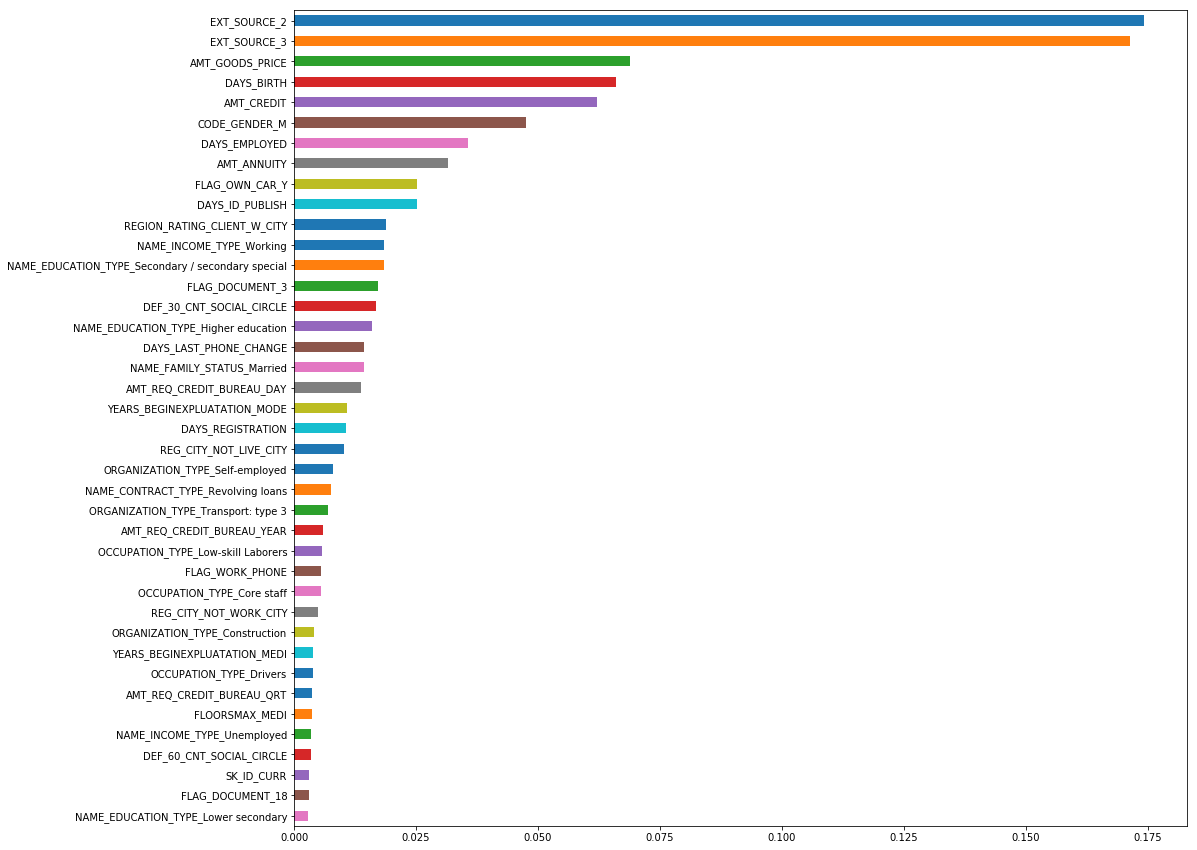

In [50]:
# GradientBoostingRegressor feature importance - top 100
feat_importances = pd.Series(clf_gb.feature_importances_, index=x.columns)
feat_importances = feat_importances.nlargest(40)
plt.figure(figsize=(16,15))
feat_importances.plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()

In [52]:
a=list(pd.Series(clf_gb.feature_importances_, index=x.columns).nlargest(40).index)

In [56]:
train3=train2[a]
train3['TARGET']=train2['TARGET']
test3=test2[a]

C:\Users\achyar059232\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [70]:
x1=train3.drop(['TARGET'],1)
y1=train3['TARGET']
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x, y= ros.fit_sample(x1,y1)
train_x,val_x,train_y,val_y=train_test_split(x,y,test_size=0.3,random_state=123)

In [71]:
#Random Forest
ranfor = RandomForestClassifier(n_estimators=10,min_samples_leaf=10, min_samples_split=10, max_depth=10, random_state=123)
ranfor.fit(train_x,train_y)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [72]:
y_predict_rf = ranfor.predict(val_x)
accuracy_score(val_y, y_predict_rf)

0.7085878357663373

In [73]:
def cfm(test, pred):
    cm1=pd.DataFrame(confusion_matrix(test, pred),columns=['Target 0','Target 1'],index=['Target 0', 'Target 1'])
    cm = confusion_matrix(test, pred)
    
    TP = cm[1][1]
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]

    total = sum(sum(cm))
    accuracy = (TN + TP)/total
    sensitivity = TP/(FN + TP)
    specificity = TN/(TN + FP)
    precision = TP / (TP+ FP)
    npv = TN / (FN + TN)
    print(cm1)
    print("Accuracy: ",accuracy)
    print("Precision: ", precision)
    print("Sensitivity: ", sensitivity)
    print("Specificity: ", specificity)
    print("Negative predictive value: ", npv)

In [74]:
cfm(val_y,y_predict_rf)

          Target 0  Target 1
Target 0     59157     25449
Target 1     23978     61028
Accuracy:  0.7085878357663373
Precision:  0.7057136579668583
Sensitivity:  0.7179257934734019
Specificity:  0.6992057300900645
Negative predictive value:  0.7115775545799001


In [75]:
gb = GradientBoostingClassifier()
gb.fit(train_x,train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [78]:
y_predict_gb = gb.predict(val_x)
accuracy_score(val_y, y_predict_gb)

0.6865905714218333

In [79]:
cfm(val_y,y_predict_gb)

          Target 0  Target 1
Target 0     58082     26524
Target 1     26634     58372
Accuracy:  0.6865905714218333
Precision:  0.6875706747078779
Sensitivity:  0.6866809401689292
Specificity:  0.6864997754296386
Negative predictive value:  0.6856083856650456


In [80]:
train3.to_csv('train.csv',index=False,header=True)